<a href="https://colab.research.google.com/github/AEInha/Linear-Algebra/blob/main/soft_ware_labs/Ex_Moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving average


$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

A moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filter.

Given a series of numbers ($y_1,\dots,y_N$) and a fixed subset size $n$, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

We implement a simple moving average $x_t$ of the given signal $y_t$ with window size $n$ as follows

$$
  x_t =
  \begin{cases}
  \left( y_t + \cdots + y_{1}\right)/t &\quad \text{if } t\le n\\
  \left( y_t + y_{t-1} + \cdots + y_{t-n+1}\right)/n &\quad \text{otherwise }
  \end{cases}
$$

In this problem, you will examine the trend from the S&P 500 indices for the past 10 years. The following cell downloads the S&P 500 index from the past 10 years, and saves the dataframe in `df`.

In [2]:
pip install yfinance

In [26]:
import yfinance as yf
import pandas as pd

# 시작 날짜와 종료 날짜 설정
start_date = '2009-09-25'
end_date = '2019-09-25'

# S&P 500 지수 데이터 다운로드
df = yf.download('^GSPC', start=start_date, end=end_date)

# 데이터프레임 출력
display(df)



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-09-25,1049.479980,1053.469971,1041.170044,1044.380005,1044.380005,4507090000
2009-09-28,1045.380005,1065.130005,1045.380005,1062.979980,1062.979980,3726950000
2009-09-29,1063.689941,1069.619995,1057.829956,1060.609985,1060.609985,4949900000
2009-09-30,1061.020020,1063.400024,1046.469971,1057.079956,1057.079956,5998860000
2009-10-01,1054.910034,1054.910034,1029.449951,1029.849976,1029.849976,5791450000
...,...,...,...,...,...,...
2019-09-18,3001.500000,3007.830078,2978.570068,3006.729980,3006.729980,3458800000
2019-09-19,3010.360107,3021.989990,3003.159912,3006.790039,3006.790039,3265660000
2019-09-20,3008.419922,3016.370117,2984.679932,2992.070068,2992.070068,6103440000


We are especially interested in the trend on the "Adj Close" price, from which we will try to read the trend.



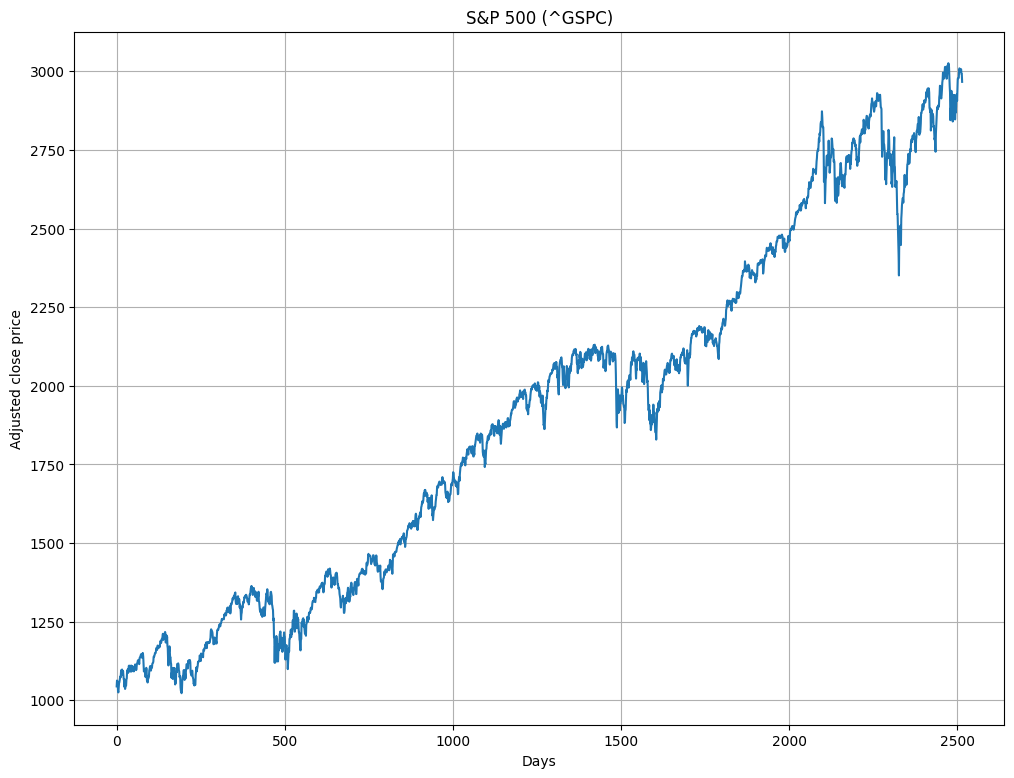

In [27]:
import matplotlib.pyplot as plt


y = df['Adj Close'].values

plt.figure(figsize=(12,9))
plt.plot(y)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('S&P 500 (^GSPC)')
plt.show()

Design various moving average filters for $n=7, 30, 90, 180$. Overlap the raw "Adj Close" data and the five moving-averaged data on a single plot.

What do you observe?


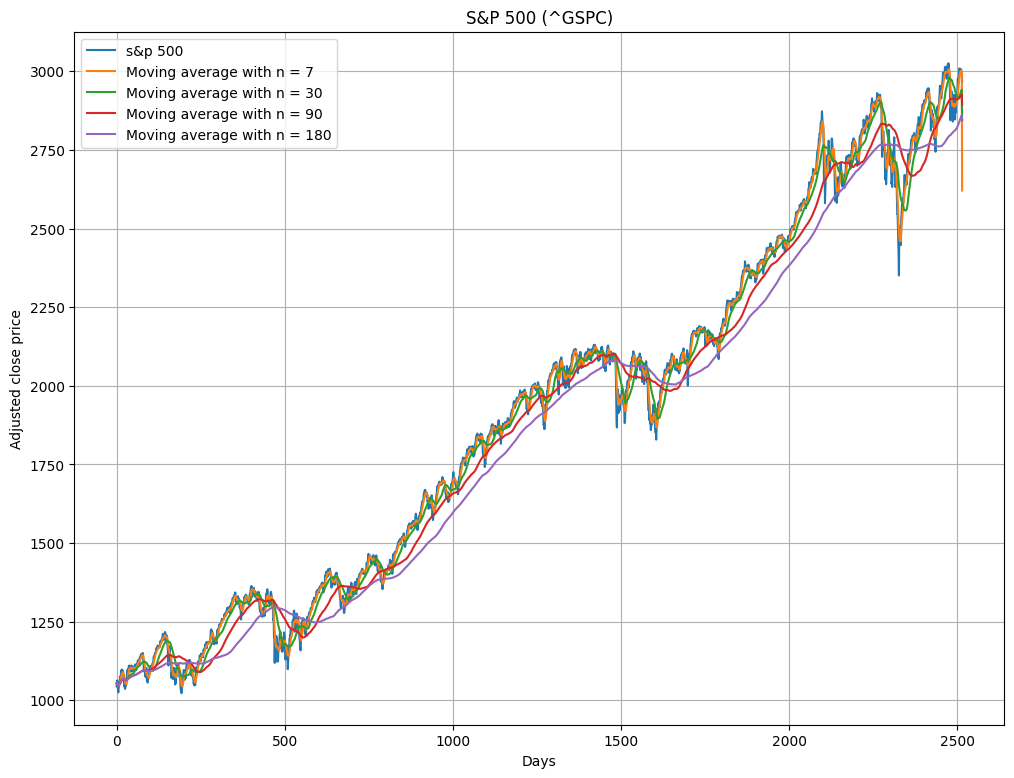

In [32]:
# your code here

def moving_average_filter(df,n):
  t= 0
  A = df["Adj Close"]
  answer = []
  for t in range(1,len(A)+1):
    if t <= n:
      answer.append(sum(A[:t+1]) / (t+1))
    else:
      answer.append(sum(A[t-n+1:t+1]) / n)
  return answer

y = df['Adj Close'].values

n7 = moving_average_filter(df,8)
n30 = moving_average_filter(df,30)
n90 = moving_average_filter(df,90)
n180 = moving_average_filter(df,180)

plt.figure(figsize=(12,9))
plt.plot(y,label = "s&p 500")
plt.plot(n7,label = "Moving average with n = 7")
plt.plot(n30,label = "Moving average with n = 30")
plt.plot(n90,label = "Moving average with n = 90")
plt.plot(n180,label = "Moving average with n = 180")
plt.grid()
plt.xlabel('Days')
plt.ylabel('Adjusted close price')
plt.title('S&P 500 (^GSPC)')
plt.legend()
plt.show()
